<center><h1>Técnicas de Inteligencia Artificial</header1></center>

Presentado por: Bryan Alfredo Solórzano Montero  <br>
Fecha: 17/07/2022

# Importación de librerias necesarias

In [34]:
# Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np

## Cargar el Dataset

In [112]:
# Código para cargar el Dataset
conjunto_datos = pd.read_csv("real_estate.csv")

In [48]:
# Visualización de los primeros datos
conjunto_datos.head(10)
# conjunto_datos['Y house price of unit area'].unique()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [49]:
# Visualización de estadisticas descriptivas del conjunto de datos
conjunto_datos.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Descripción de la fuente del Dataset

URL: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction

En el data set se enceuntra un total de 414 registros o filas, tiene 8 caracteristicas, aquí se incluye la variable objetivo como lo puede ser el precio de la viviendo por unidad de superficie. El siginficado de cada columna (atributo) se define a continuación

**X1 transaction date:** Fecha de transacción en la que se hizo el negocio de la casa

**X2 house age:** Un calculo sobre cuento tiempo lleva construida la casa

**X3 distance to the nearest MRT station:** La distiancia que existe entre la casa y el metro más cercano

**X4 number of convenience stores:** El número de teindas convenientes cerca de la casa

**X5 latitude**: Latitud de la casa

**X6 longitude:** Longitud de la casa

**Y house price of unit area:** Y precio de la vivienda por unidad por superficie, es algo así sobre su valuación pro metro cuadrado






## Explique el problema a resolver. 

Se busca crear un modelo de aprendizaje automático supervisado que permita predecir el precio adecuado de una vivienda por unidad de superfice. Para lo cual viene bien el conjunto de datos expuesto anteriormente. Teniendo 414 ejemplos, donde, la variable objetivo es denominada 'Y house price of unit area' y existiendo por lo tanto 7 variavles de entrada denominadas: **X1 transaction date**, **X2 house age**, **X3 distance to the nearest MRT station**, **X4 number of convenience stores**, **X5 latitude**:**X6 longitude**

Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


# Código que responde a la descripción de los datos

In [50]:
# Número de instancias en total
conjunto_datos.count()

No                                        414
X1 transaction date                       414
X2 house age                              414
X3 distance to the nearest MRT station    414
X4 number of convenience stores           414
X5 latitude                               414
X6 longitude                              414
Y house price of unit area                414
dtype: int64

In [51]:
# Núemro de atributos de entrada, su significado y tipo
conjunto_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


<AxesSubplot:>

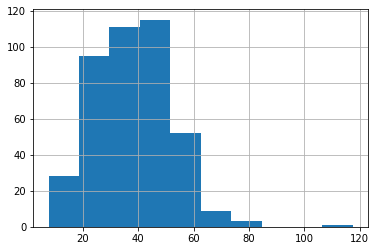

In [52]:
# Estadísticas de la variable objetivo
%matplotlib inline
#Crear gráfico de barras como la variable objetivo (tipo) continua.
conjunto_datos['Y house price of unit area'].hist()

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [195]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)

# Variable objetivo y variables de entrada
# VariableObjetivo=['X4 number of convenience stores']
VariableObjetivo=['Y house price of unit area']
# VariablesEntrada=['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']
VariablesEntrada=['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# Definimos las varaibles
X = conjunto_datos[VariablesEntrada].values
y = conjunto_datos[VariableObjetivo].values

In [196]:
### Estandarización de la data ###
from sklearn.preprocessing import StandardScaler
VariablesEntradaScaler=StandardScaler()
VariableObjetivoScaler=StandardScaler()

In [197]:
# Almacenamiento del objeto de ajuste para referencia posterior
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [198]:
# Generación de los valores estandarizados de X e y
X=VariablesEntradaFit.transform(X)
y=VariableObjetivoFit.transform(y)

## División del dataset en datos de entrenamiento y datos de test 

In [199]:
# Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [200]:
# Comprobación rápida del tamaño de los conjuntos de datos de entrenamiento y prueba
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(289, 6)
(289, 1)
(125, 6)
(125, 1)


## Regresión Lineal

In [201]:
# Importaciones necesarias
from sklearn.linear_model import LinearRegression # Para instanciar el modelo de regresión

#Códo del modelo
linealR = LinearRegression()

In [202]:
#Entrenamiento para la regresión

# Ajustar el clasificador a los datos de entrenamiento de entrada
linealR.fit(X_train, y_train) 

LinearRegression()

In [203]:
# TESY

# El modelo en sus capacidades tendra que hacer sus predicciones y nosotros más a delante las compararemos
y_pred = linealR.predict(X_test) 
# print(y_pred)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6509058479985661

## Evaluación del Modelo

Primeramente el modelo no peude ser 100% confiable, devido a que siempre tendra un margen de error. Ese margen de error es observable gracias a la comparación de listas entre lo predecido y la prueba. 

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 

In [204]:
# Primero verifiquemos que tanto la lista de prediciones es tiene el mismo numerp de datos
print(np.array_equal(y_pred, y_test))

False
